In [1]:
# uncomment below line of code if you want to calculate features and save dataframe
# this script prints the path at which dataframe with calculated features is saved.
# train.py calls the DataGenerator class to 

#%run ./train.py WMT original

# this notebook was trained on cloud compute. So use your own paths

In [1]:
import pandas as pd
import pickle 
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.core.interactiveshell import InteractiveShell


np.random.seed(2)
# company_code = 'WMT'
# strategy_type = 'original'
# use the path printed in above output cell after running stock_cnn.py. It's in below format
# df = pd.read_csv("E:/Host/Data/Bees/From/stock_cnn_blog_pub/stock_history/WMT/"+company_code+".csv")
# df['labels'] = df['labels'].astype(np.int8)
# if 'dividend_amount' in df.columns:
#     df.drop(columns=['dividend_amount', 'split_coefficient'], inplace=True)
df = pd.read_csv('E:/Host/Data/Bees/Finance_ML/day.csv', decimal='.', sep = ',', encoding='latin-1')
display(df.head())
list(df)

,Unnamed: 0,Date_test,profit,Year,Symbol,WilliamsR30,Volatility24_12,VHFClose_24,TRIXClose_10,StochRSIClose_14,...,CCI20,ATRP14,ATR14,AroonDownClose_20,AroonUpClose_20,ADX14,ADXR14,DIMinus14,DIPlus14,DX20
0,0,2010-01-11,14.311350,2010,URKA,89.607043,-21.151933,0.440946,-0.537211,8.123361,...,-79.807059,3.670934,4.607022,75,5,27.980367,19.687985,29,11,32
1,1,2010-01-11,4.358991,2010,SBERP,26.684920,21.865110,0.591698,1.067853,4.964309,...,39.318831,4.086430,2.819637,15,60,36.205503,34.592859,23,32,22
2,2,2010-01-11,4.563549,2010,SBER,6.886788,-2.874256,0.529781,0.605799,78.213306,...,88.070021,2.718513,2.254735,15,100,27.971986,20.454163,13,31,33
3,3,2010-01-11,-1.719991,2010,RTKM,89.999997,-17.979104,0.436747,-0.749761,63.468448,...,-120.610565,3.887515,5.774126,70,5,35.128879,31.573526,32,10,35
4,4,2010-01-11,4.229478,2010,SIBN,48.426244,-20.075710,0.353720,0.008332,8.790564,...,-74.131274,2.706297,4.431020,0,45,12.571313,15.937069,20,19,5


['Unnamed: 0',
 'Date_test',
 'profit',
 'Year',
 'Symbol',
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [2]:
df['labels'] = np.where(df['profit']>0,1,0)

Split data into Training, Validation and Test

In [3]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

list_features = list(df.loc[:, 'WilliamsR30':'ADXR14'].columns)
print('Total number of features', len(list_features))
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'WilliamsR30':'ADXR14'].values, df['labels'].values, train_size=0.8, 
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=df['labels'].values)

# smote = RandomOverSampler(random_state=42, sampling_strategy='not majority')
# x_train, y_train = smote.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train))

if 0.7*x_train.shape[0] < 2500:
    train_split = 0.8
else:
    train_split = 0.7
# train_split = 0.7
print('train_split =',train_split)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split, test_size=1-train_split, 
                                                random_state=2, shuffle=True, stratify=y_train)
mm_scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Total number of features 36
train_split = 0.7
Shape of x, y train/cv/test (27609, 36) (27609,) (11833, 36) (11833,) (9861, 36) (9861,)


Out of total 441+ features select top 'N' features (let's include base features like close, adjusted_close etc)

In [5]:
num_features = 36  # should be a perfect square
selection_method = 'all'
topk = 320 if selection_method == 'all' else num_features
# if train_split >= 0.8:
#     topk = 400
# else:
#     topk = 300

In [6]:
%%time
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

if selection_method == 'anova' or selection_method == 'all':
    select_k_best = SelectKBest(f_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)
    
    selected_features_anova = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(selected_features_anova)
    print(select_k_best.get_support(indices=True))
    print("****************************************")
    
if selection_method == 'mutual_info' or selection_method == 'all':
    select_k_best = SelectKBest(mutual_info_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)

    selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(len(selected_features_mic), selected_features_mic)
    print(select_k_best.get_support(indices=True))

ValueError: k should be >=0, <= n_features = 36; got 320. Use k='all' to return all features.

In [7]:
if selection_method == 'all':
    common = list(set(selected_features_anova).intersection(selected_features_mic))
    print("common selected featues", len(common), common)
    if len(common) < num_features:
        raise Exception('number of common features found {} < {} required features. Increase "topk variable"'.format(len(common), num_features))
    feat_idx = []
    for c in common:
        feat_idx.append(list_features.index(c))
    feat_idx = sorted(feat_idx[0:225])
    print(feat_idx)

NameError: name 'selected_features_anova' is not defined

In [8]:
if selection_method == 'all':
    x_train = x_train[:, feat_idx]
    x_cv = x_cv[:, feat_idx]
    x_test = x_test[:, feat_idx]

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, 
                                                             y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

NameError: name 'feat_idx' is not defined

In [9]:
_labels, _counts = np.unique(y_train, return_counts=True)
print("percentage of class 0 = {}, class 1 = {}".format(_counts[0]/len(y_train) * 100, _counts[1]/len(y_train) * 100))

percentage of class 0 = 49.295519576949545, class 1 = 50.704480423050455


In [10]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = compute_class_weight('balanced', np.unique(y), y)
    
    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall 
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [11]:
sample_weights = get_sample_weights(y_train)
print("Test sample_weights")
rand_idx = np.random.randint(0, 1000, 30)
print(y_train[rand_idx])
print(sample_weights[rand_idx])

real class weights are [1.01429096 0.98610615] [0 1]
value_counts (array([0, 1]), array([13610, 13999], dtype=int64))
Test sample_weights
[0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0]
[1.01429096 0.98610615 0.98610615 1.01429096 0.98610615 1.01429096
 1.01429096 1.01429096 1.01429096 1.01429096 1.01429096 0.98610615
 1.01429096 1.01429096 1.01429096 0.98610615 0.98610615 0.98610615
 0.98610615 1.01429096 0.98610615 0.98610615 1.01429096 0.98610615
 0.98610615 1.01429096 1.01429096 1.01429096 0.98610615 1.01429096]


In [12]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
print("y_train",y_train.shape)
y_cv = one_hot_enc.transform(y_cv.reshape(-1, 1))
y_test = one_hot_enc.transform(y_test.reshape(-1, 1))

y_train (27609, 2)


In [86]:
x_train.shape

(27609, 36)

In [95]:
dim = int(np.sqrt(num_features))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)
print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (27609, 6, 6, 3) (27609,) (9861, 6, 6, 3) (9861,)


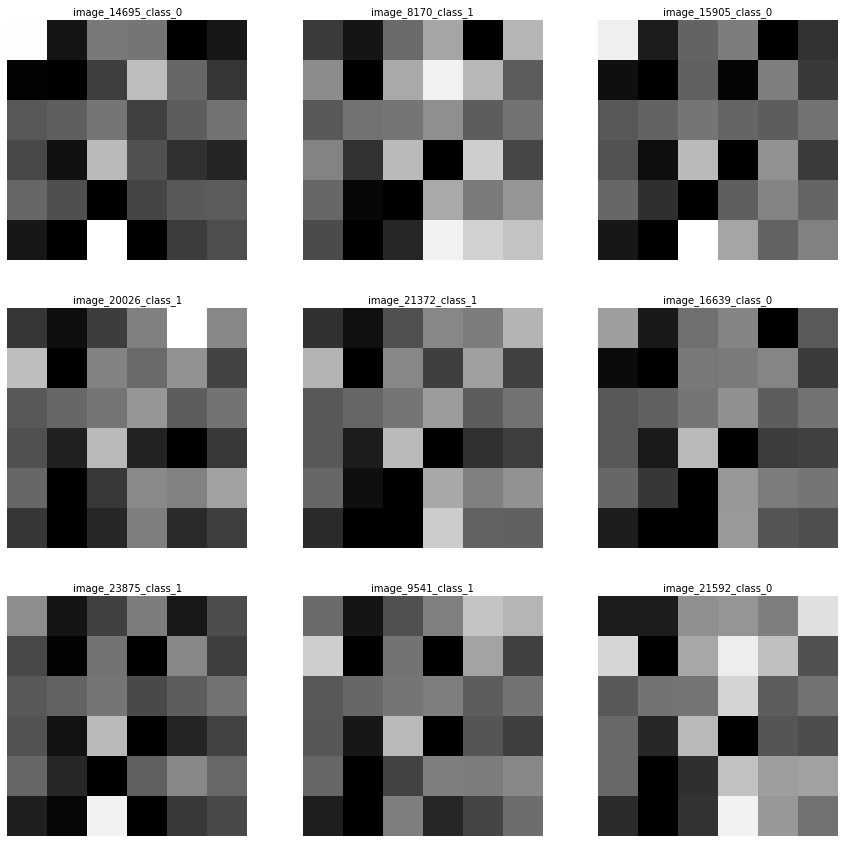

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()

In [15]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, RandomNormal
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

params = {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.2, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 
                                               'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.3, 
                                               'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 2, 'conv2d_strides_2': 1, 
                                               'kernel_regularizer_2': 0.0, 'layers': 'two'}, 
           'dense_layers': {'dense_do_1': 0.3, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
           'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam'}


In [28]:
from functools import *
from sklearn.metrics import f1_score
from tensorflow.keras.metrics import AUC

def f1_custom(y_true, y_pred):
    y_t = np.argmax(y_true, axis=1)
    y_p = np.argmax(y_pred, axis=1)
    f1_score(y_t, y_p, labels=None, average='weighted', sample_weight=None, zero_division='warn')

def create_model_cnn(params):
    model = Sequential()

    print("Training with params {}".format(params))
    
    conv2d_layer1 = Conv2D(params["conv2d_layers"]["conv2d_filters_1"],
                           params["conv2d_layers"]["conv2d_kernel_size_1"],
                           strides=params["conv2d_layers"]["conv2d_strides_1"],
                           kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_1"]), 
                           padding='same',activation="relu", use_bias=True,
                           kernel_initializer='glorot_uniform',
                           input_shape=(x_train[0].shape[0],
                                        x_train[0].shape[1], x_train[0].shape[2]))
    model.add(conv2d_layer1)
    if params["conv2d_layers"]['conv2d_mp_1'] > 1:
        model.add(MaxPool2D(pool_size=params["conv2d_layers"]['conv2d_mp_1']))
        
    model.add(Dropout(params['conv2d_layers']['conv2d_do_1']))
    if params["conv2d_layers"]['layers'] == 'two':
        conv2d_layer2 = Conv2D(params["conv2d_layers"]["conv2d_filters_2"],
                               params["conv2d_layers"]["conv2d_kernel_size_2"],
                               strides=params["conv2d_layers"]["conv2d_strides_2"],
                               kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_2"]),
                               padding='same',activation="relu", use_bias=True,
                               kernel_initializer='glorot_uniform')
        model.add(conv2d_layer2)
        
        if params["conv2d_layers"]['conv2d_mp_2'] > 1:
            model.add(MaxPool2D(pool_size=params["conv2d_layers"]['conv2d_mp_2']))
        
        model.add(Dropout(params['conv2d_layers']['conv2d_do_2']))

    model.add(Flatten())

    model.add(Dense(params['dense_layers']["dense_nodes_1"], activation='relu'))
    model.add(Dropout(params['dense_layers']['dense_do_1']))

    if params['dense_layers']["layers"] == 'two':
        model.add(Dense(params['dense_layers']["dense_nodes_2"], activation='relu', 
                        kernel_regularizer=params['dense_layers']["kernel_regularizer_1"]))
        model.add(Dropout(params['dense_layers']['dense_do_2']))

    model.add(Dense(2, activation='softmax'))
    
    if params["optimizer"] == 'rmsprop':
        optimizer = optimizers.RMSprop(lr=params["lr"])
    elif params["optimizer"] == 'sgd':
        optimizer = optimizers.SGD(lr=params["lr"], decay=1e-6, momentum=0.9, nesterov=True)
    elif params["optimizer"] == 'adam':
        optimizer = optimizers.Adam(learning_rate=params["lr"], beta_1=0.9, beta_2=0.999, amsgrad=False)
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_metric])
    
    return model

def check_baseline(pred, y_test):
    print("size of test set", len(y_test))
    e = np.equal(pred, y_test)
    print("TP class counts", np.unique(y_test[e], return_counts=True))
    print("True class counts", np.unique(y_test, return_counts=True))
    print("Pred class counts", np.unique(pred, return_counts=True))
    holds = np.unique(y_test, return_counts=True)[1][2]  # number 'hold' predictions
    print("baseline acc:", (holds/len(y_test)*100))

Training with params {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.2, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.3, 'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 2, 'conv2d_strides_2': 1, 'kernel_regularizer_2': 0.0, 'layers': 'two'}, 'dense_layers': {'dense_do_1': 0.3, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'}, 'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam'}


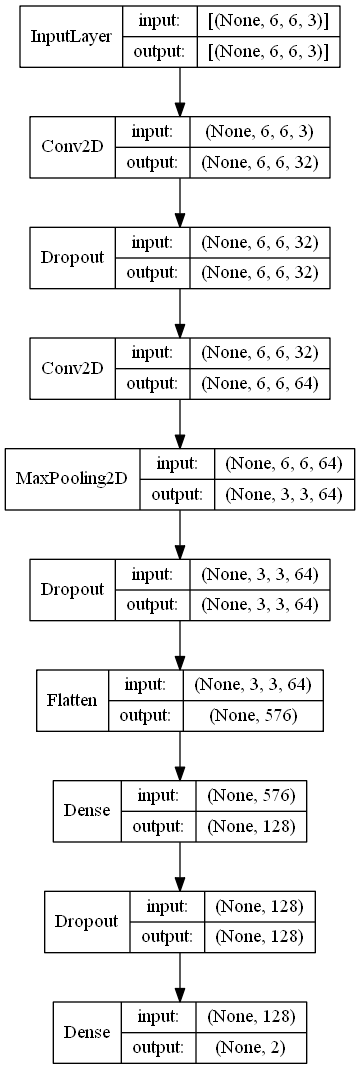

In [29]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

model = create_model_cnn(params)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [72]:
import os

best_model_path = os.path.join('.', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=100, min_delta=0.0001)
# csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'log_training_batch.log'), append=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001)
mcp = ModelCheckpoint(best_model_path, monitor='val_f1_metric', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='max', period=1)  # val_f1_metric

In [73]:
%%time
history = model.fit(x_train, y_train, epochs=params['epochs'], verbose=1,
                            batch_size=64, shuffle=True,
                            # validation_split=0.3,
                            validation_data=(x_cv, y_cv),
                            callbacks=[mcp, rlp, es]
                            , sample_weight=sample_weights)

Train on 27609 samples, validate on 11833 samples
Epoch 1/3000
27200/27609 [============================>.] - ETA: 0s - loss: 0.6890 - acc: 0.5290 - f1_metric: 0.5290
Epoch 00001: val_f1_metric improved from -inf to 0.50986, saving model to .\best_model_keras
27609/27609 [==============================] - 5s 165us/sample - loss: 0.6889 - acc: 0.5298 - f1_metric: 0.5297 - val_loss: 0.6934 - val_acc: 0.5098 - val_f1_metric: 0.5099
Epoch 2/3000
27200/27609 [============================>.] - ETA: 0s - loss: 0.6891 - acc: 0.5327 - f1_metric: 0.5327
Epoch 00002: val_f1_metric improved from 0.50986 to 0.51391, saving model to .\best_model_keras
27609/27609 [==============================] - 4s 142us/sample - loss: 0.6890 - acc: 0.5330 - f1_metric: 0.5332 - val_loss: 0.6929 - val_acc: 0.5140 - val_f1_metric: 0.5139
Epoch 3/3000
27520/27609 [============================>.] - ETA: 0s - loss: 0.6890 - acc: 0.5286 - f1_metric: 0.5286
Epoch 00003: val_f1_metric did not improve from 0.51391
27609/27

Epoch 24/3000
27456/27609 [============================>.] - ETA: 0s - loss: 0.6883 - acc: 0.5322 - f1_metric: 0.5322
Epoch 00024: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 150us/sample - loss: 0.6883 - acc: 0.5321 - f1_metric: 0.5322 - val_loss: 0.6934 - val_acc: 0.5108 - val_f1_metric: 0.5107
Epoch 25/3000
27328/27609 [============================>.] - ETA: 0s - loss: 0.6888 - acc: 0.5341 - f1_metric: 0.5341
Epoch 00025: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 141us/sample - loss: 0.6888 - acc: 0.5341 - f1_metric: 0.5342 - val_loss: 0.6933 - val_acc: 0.5104 - val_f1_metric: 0.5104
Epoch 26/3000
27456/27609 [============================>.] - ETA: 0s - loss: 0.6890 - acc: 0.5293 - f1_metric: 0.5293
Epoch 00026: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 141us/sample - loss: 0.6890 - acc: 0.5293 - f1_metric: 0.5293 - val_loss: 0.6936 -

Epoch 48/3000
27520/27609 [============================>.] - ETA: 0s - loss: 0.6880 - acc: 0.5362 - f1_metric: 0.5362
Epoch 00048: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 140us/sample - loss: 0.6880 - acc: 0.5359 - f1_metric: 0.5356 - val_loss: 0.6940 - val_acc: 0.5089 - val_f1_metric: 0.5089
Epoch 49/3000
27584/27609 [============================>.] - ETA: 0s - loss: 0.6877 - acc: 0.5377 - f1_metric: 0.5377
Epoch 00049: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 139us/sample - loss: 0.6877 - acc: 0.5378 - f1_metric: 0.5379 - val_loss: 0.6936 - val_acc: 0.5114 - val_f1_metric: 0.5114
Epoch 50/3000
27392/27609 [============================>.] - ETA: 0s - loss: 0.6883 - acc: 0.5326 - f1_metric: 0.5326
Epoch 00050: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 140us/sample - loss: 0.6883 - acc: 0.5324 - f1_metric: 0.5327 - val_loss: 0.6937 -

Epoch 72/3000
27328/27609 [============================>.] - ETA: 0s - loss: 0.6877 - acc: 0.5351 - f1_metric: 0.5351
Epoch 00072: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 140us/sample - loss: 0.6877 - acc: 0.5354 - f1_metric: 0.5353 - val_loss: 0.6939 - val_acc: 0.5105 - val_f1_metric: 0.5105
Epoch 73/3000
27328/27609 [============================>.] - ETA: 0s - loss: 0.6876 - acc: 0.5367 - f1_metric: 0.5367
Epoch 00073: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 138us/sample - loss: 0.6875 - acc: 0.5369 - f1_metric: 0.5369 - val_loss: 0.6937 - val_acc: 0.5081 - val_f1_metric: 0.5081
Epoch 74/3000
27328/27609 [============================>.] - ETA: 0s - loss: 0.6875 - acc: 0.5318 - f1_metric: 0.5318
Epoch 00074: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 139us/sample - loss: 0.6874 - acc: 0.5322 - f1_metric: 0.5322 - val_loss: 0.6940 -

Epoch 96/3000
27392/27609 [============================>.] - ETA: 0s - loss: 0.6869 - acc: 0.5373 - f1_metric: 0.5373
Epoch 00096: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 138us/sample - loss: 0.6869 - acc: 0.5373 - f1_metric: 0.5373 - val_loss: 0.6943 - val_acc: 0.5082 - val_f1_metric: 0.5081
Epoch 97/3000
27264/27609 [============================>.] - ETA: 0s - loss: 0.6876 - acc: 0.5384 - f1_metric: 0.5384
Epoch 00097: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 139us/sample - loss: 0.6876 - acc: 0.5381 - f1_metric: 0.5378 - val_loss: 0.6938 - val_acc: 0.5078 - val_f1_metric: 0.5078
Epoch 98/3000
27392/27609 [============================>.] - ETA: 0s - loss: 0.6871 - acc: 0.5403 - f1_metric: 0.5403
Epoch 00098: val_f1_metric did not improve from 0.51475
27609/27609 [==============================] - 4s 140us/sample - loss: 0.6871 - acc: 0.5405 - f1_metric: 0.5404 - val_loss: 0.6939 -

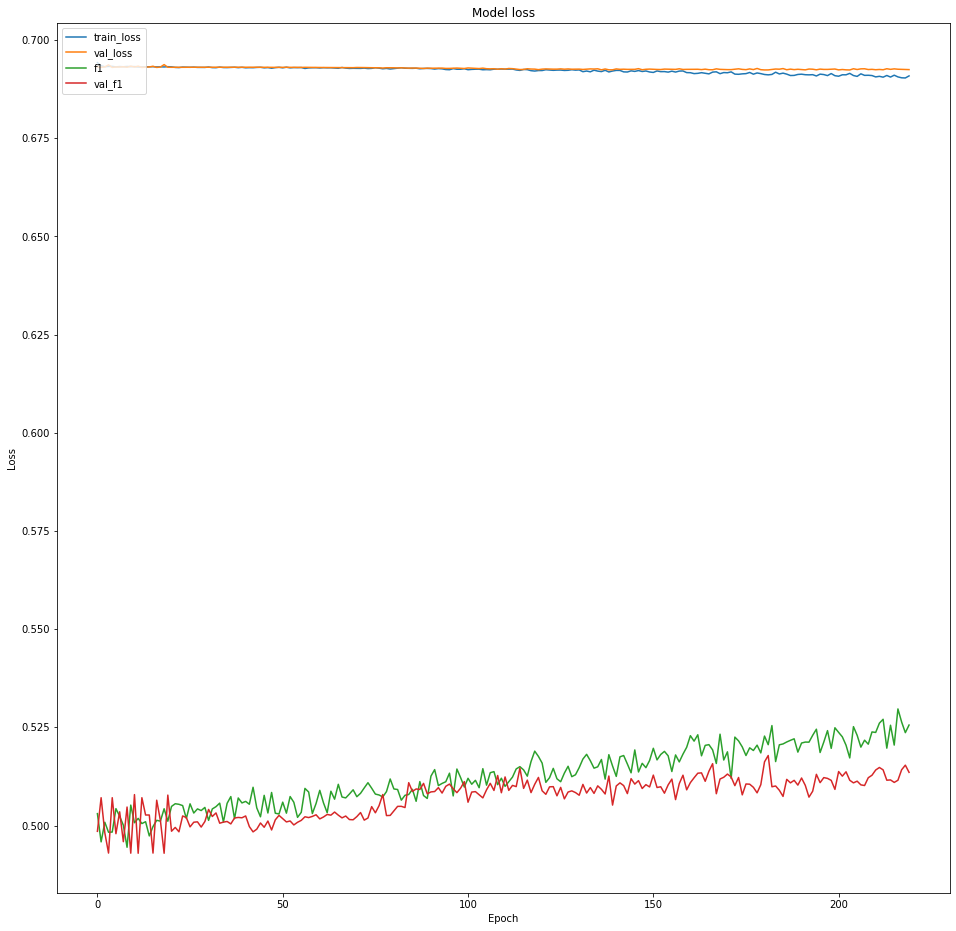

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
InteractiveShell.ast_node_interactivity = "last"

plt.figure(figsize=(16,16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss', 'f1', 'val_f1'], loc='upper left')
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns

model = load_model(best_model_path)
test_res = model.evaluate(x_test, y_test, verbose=0)
print("keras evaluate=", test_res)
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
#check_baseline(pred_classes, y_test_classes)
conf_mat = confusion_matrix(y_test_classes, pred_classes)
print(conf_mat)
labels = [0,1,2]

f1_weighted = f1_score(y_test_classes, pred_classes, labels=None, 
         average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='micro', sample_weight=None))  # weighted and micro preferred in case of imbalance

# https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa --> supports multiclass; ref: https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english
print("cohen's Kappa", cohen_kappa_score(y_test_classes, pred_classes))

recall = []
for i, row in enumerate(conf_mat):
    recall.append(np.round(row[i]/np.sum(row), 2))
    print("Recall of class {} = {}".format(i, recall[i]))
print("Recall avg", sum(recall)/len(recall))

keras evaluate= [0.693087612660223, 0.5105973, 0.5102952]
[[2112 2749]
 [2077 2923]]
F1 score (weighted) 0.5078356941351764
F1 score (macro) 0.5072644685944321
F1 score (micro) 0.5105973025048169
cohen's Kappa 0.019115233815268695
Recall of class 0 = 0.43
Recall of class 1 = 0.58
Recall avg 0.505


In [62]:
pred_df = pd.DataFrame(pred)
y_test_df = pd.DataFrame(y_test)
pred_df = pd.concat([pred_df, y_test_df], axis=1)
pred_df

,0,1,0,1
0,0.513769,0.486231,0.0,1.0
1,0.508658,0.491342,0.0,1.0
2,0.498687,0.501313,1.0,0.0
3,0.480054,0.519946,0.0,1.0
4,0.481497,0.518503,1.0,0.0
...,...,...,...,...
9856,0.462180,0.537820,1.0,0.0
9857,0.515169,0.484831,1.0,0.0
9858,0.462192,0.537808,1.0,0.0
9859,0.503210,0.496790,0.0,1.0


In [63]:
pred_df.to_excel('pred_df.xlsx')